In [25]:
import gym
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

In [26]:
env = gym.make('CartPole-v0')
path_to_recording = './tmp/CartPole-v0-Random-Search'
#env.monitor.start(path_to_recording, force=True)

[2016-12-28 20:10:54,659] Making new env: CartPole-v0


In [27]:
state_space_size = env.observation_space.shape[0]
get_rand_weights = lambda : np.random.random(4)

In [37]:
def run_episode(env, weights):
    state = env.reset()
    total_reward = 0.0
    steps = 0.0
    while True:
        action = 0 if np.sum(state * weights) < 0 else 1
        state_prime, reward, is_done, _ = env.step(action)
        total_reward += reward
        state = state_prime
        steps += 1
        if is_done or steps > 250:
            break
    return total_reward
    

In [38]:
best_reward = 0.0
best_weights = None
for epoch in xrange(10000):
    weights = get_rand_weights()
    eps_reward = run_episode(env, weights)
    if eps_reward > best_reward:
        best_reward = eps_reward
        best_weights = weights
    print epoch, 'reward', eps_reward, 'best reward', best_reward
    
    if eps_reward > 199.0:
        print 'found solution'
        break

print 'testing model'
print 'weights', best_weights
rewards = []
for i in range(200):
    eps_reward = run_episode(env, best_weights)
    rewards.append(eps_reward)
    print i, 'reward', eps_reward

0 reward 81.0 best reward 81.0
1 reward 17361.0 best reward 17361.0
found solution
testing model
weights [ 0.54671028  0.18485446  0.96958463  0.77513282]
0 reward 4379.0
1 reward 12692.0
2 reward 227.0
3 reward 296.0
4 reward 114426.0
5 reward 3238.0
6 reward 222.0
7 reward 25691.0
8 reward 188.0
9 reward 123.0
10 reward 257.0
11 reward 281.0
12 reward 249.0
13 reward 30205.0
14 reward 199.0
15 reward 184.0
16 reward 185.0
17 reward 63136.0
18 reward 170208.0
19 reward 52092.0
20 reward 241.0
21 reward 179.0
22 reward 4651.0
23 reward 247.0
24 reward 385.0
25 reward 242.0
26 reward 194.0
27 reward 15217.0
28 reward 192.0
29 reward 3151.0
30 reward 217.0
31 reward 252.0
32 reward 67679.0
33 reward 216.0
34 reward 183.0
35 reward 349.0
36 reward 223.0
37 reward 189.0
38 reward 239.0
39 reward 191.0
40 reward 93210.0
41 reward 185.0
42 reward 115086.0
43 reward 216.0
44 reward 3360.0
45 reward 286.0
46 reward 79630.0
47 reward 263.0
48 reward 182.0
49 reward 185.0
50 reward 29013.0
51 re

In [39]:
def visualize(env, weights):
    state = env.reset()
    while True:
        env.render()
        action = 0 if np.sum(state * weights) < 0 else 1
        state, _, _, _ = env.step(action)
    

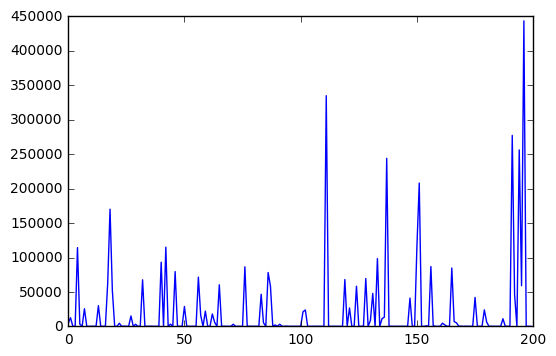

In [40]:
plt.plot(rewards)
plt.show()